Matt Griffiths (V00752005)

<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 2

## Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.

**1** To start, make a $N(0,1)$ random variable $x$, with 200,000 entries.  Then make a linearly dependent variable $y_i= a x_i + n_i$, where a is some amplitude, and $n_i$ is a random noise varaible.  Assume that $n_i$ is distributed as $N(0,n)$, where $n$ is the noise level.

Calculate the correlation co-efficient $r_{xy}$ between $x$ and $y$ for 40 different values of $n$, logarithmically spaced between 0.01 and 100. (hint use `np.logspace`).  

Plot $r_{xy}$ versus the inverse of the noise $n$ normalized by the standard devaition of the signal $ax_i$: $\frac{a s_x}{n}$   You may want to use `ax.loglog` to visualize the orders of magnitude.  

Comment on the resulting comparison.

#### Coding hint:

You are going to need to generate 40 realizations of the random process, so do this in a `for`-loop, and save the results in an array that you initialize before the for-loop:
```python
r = np.zeros(40)
for ind,n in enumerate(noisevalues):
  # make your random variable
  ...
  # calculate r
  r[ind]=...
```
<hr>

In [2]:
import numpy as np
import scipy as sc
import math as m
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
import matplotlib.cm as cm
import scipy.stats as stats
%matplotlib inline

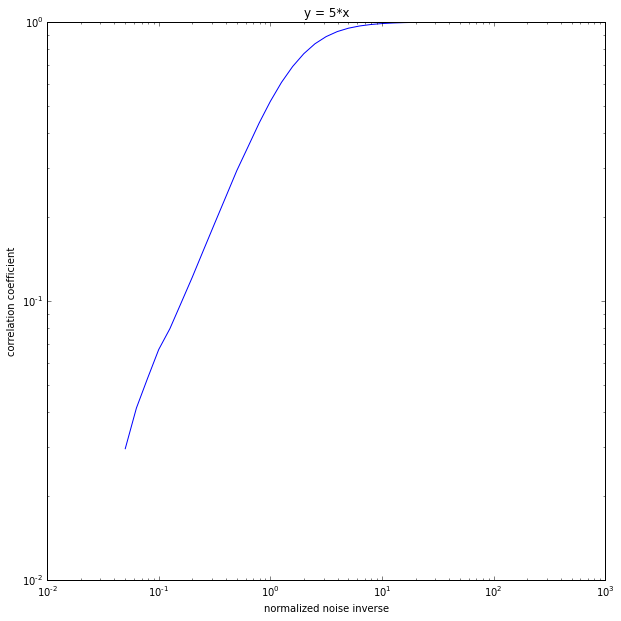

In [3]:
def correlationtest(a, n):
    ent = 200000
    x = np.random.normal(0, 1, size=ent); x = x-np.mean(x)
    rxy = np.zeros(n+1)
    y = a*x
    noise = np.logspace(-2, 2, n+1, base=10)

    for i, n in enumerate(noise):
        y = y + np.random.normal(0, n, size=ent)
        rxy[i] = m.sqrt(((np.sum(np.dot(x,y)))**2)/((np.sum(x**2))*(np.sum(y**2))))
    return [x, y, rxy, noise] 

def plotcorrelation(ax, a, n):
    xyrnois = correlationtest(a , n)
    
    invnoisenorm = np.std(a*xyrnois[0])/xyrnois[3]
    
    ax.loglog(invnoisenorm, xyrnois[2])
    ax.set_title('y = ' + str(a) +'*x')
    ax.set_xlabel('normalized noise inverse')
    ax.set_ylabel('correlation coefficient')
    return ax

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax = plotcorrelation(ax, 5, 40)

as the noise gets smaller (inverse noise gets larger) the correlation coefficient approaches 1, which is to be expected.

**2** Repeat the above, but with a different value of $a$.  Comment on how (and why) $a$ changes the value of $r_{xy}$.  

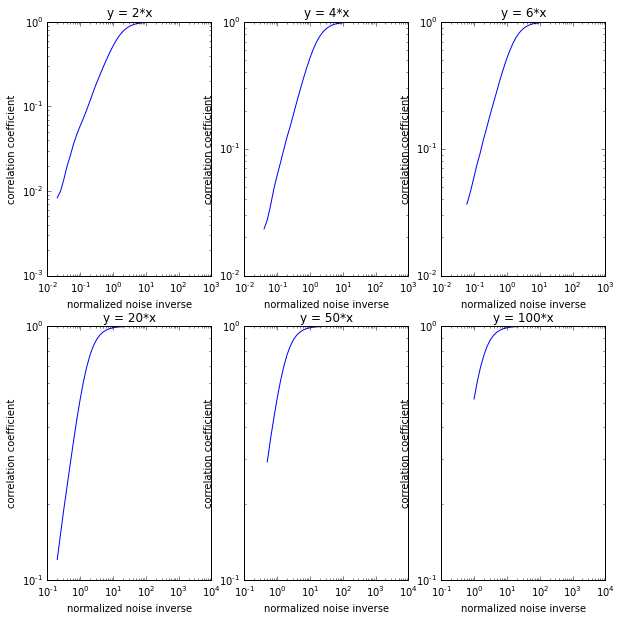

In [4]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,3,1); plotcorrelation(ax1, 2, 40)
ax2 = plt.subplot(2,3,2); plotcorrelation(ax2, 4, 40)
ax3 = plt.subplot(2,3,3); plotcorrelation(ax3, 6, 40)
ax4 = plt.subplot(2,3,4); plotcorrelation(ax4, 20, 40)
ax5 = plt.subplot(2,3,5); plotcorrelation(ax5, 50, 40)
ax6 = plt.subplot(2,3,6); plotcorrelation(ax6, 100, 40)

With a smaller slope between x and y, the correlation coefficient aproaches another order of magnitude less correlated, then the previous one. This makes sense, the y data being smaller, while the noise remains at the same levels, the correlated components of the data become even less significant with the smaller slope between x and y.

## Q2: Monte Carlo on slopes and test versus student-t distribution

**1** We stated without proof that the slope $b$ of a linear fit of $y$ to $x$ is distributed as a student-t distribution with $N-2$ degrees of freedom, with a standard devaition given by the standard deviation of $y$ around the fit model $\tilde{y}$.   Lets test that emperically using a Monte Carlo technique.  

First create an independet variable $x$ from 10 points from an $N(0,1)$ distribution.

Next, using $n=1.0$, and $a=1.0$ create the dependent variables $y_i=a x_i + n_i$ where $n_i$ are drawn from the $N(0,n)$ distribution.  Calculate the slope $b$.  

Do this 10000 times, and make a histogram of the resulting fits $b$.  Also histogram $s_{y|x}$ as defined in the notes.

Comment on the histigrams

<hr>

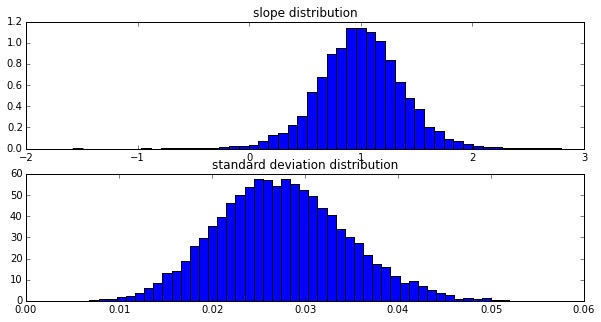

In [5]:
N = 10000
b = np.zeros(N)
syx = np.zeros(N)
tnminus2 = b*0.
for i in range(0, N, 1):
    x = np.random.normal(0, 1, 10)
    y = x + np.random.normal(0, 1, 10)
    b[i] = np.sum((y-np.mean(y))*x)/np.sum((x-np.mean(x))*x)
    yhat = b[i]*x + np.mean(y)-b[i]*np.mean(x)
    syx[i] = np.sqrt(np.sum((y-yhat)**2)/(N-2))
    
tnminus2 = (b-np.mean(b))*np.sum((x-np.mean(x))**2)

fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(2,1,1); n, bins, patches = plt.hist(b, 50, normed=True)
plt.title('slope distribution')
ax2 = plt.subplot(2,1,2); n, bins, patches = plt.hist(syx, 50, normed=True)
plt.title('standard deviation distribution')

Histograms seem pretty normal

**2** Assuming $s_{y|x}=1.$ (which is the same as our value of $n$), plot the student-t probability density function on the histogram of b and show that they compare favorably (if they don't you might need to check your work!)

<hr>

(-5, 5)

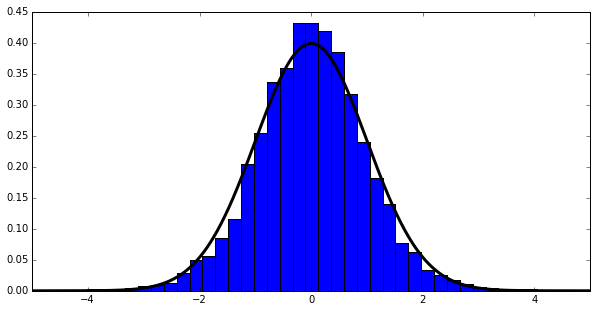

In [6]:
df = N-2
xt = np.linspace(stats.t.ppf(0.0001, df), stats.t.ppf(0.9999, df), 1000)

tnminus2 = np.sort(tnminus2, 0)
rv = stats.t.pdf(tnminus2, df)

fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(111); n, bins, patches = plt.hist(((b-np.mean(b))/np.std(b)), 50, normed=1)
ax1 = plt.subplot(111)
plt.plot(tnminus2, rv, 'k-', lw=3, alpha=1)
plt.xlim(-5, 5)

They compare so favourably.

**3** Do the same procedure for a different number of data points, and a different value for the noise level $n$.  Remember to scale your theoretical histogram by the new expected value of $s_{y|x}$.

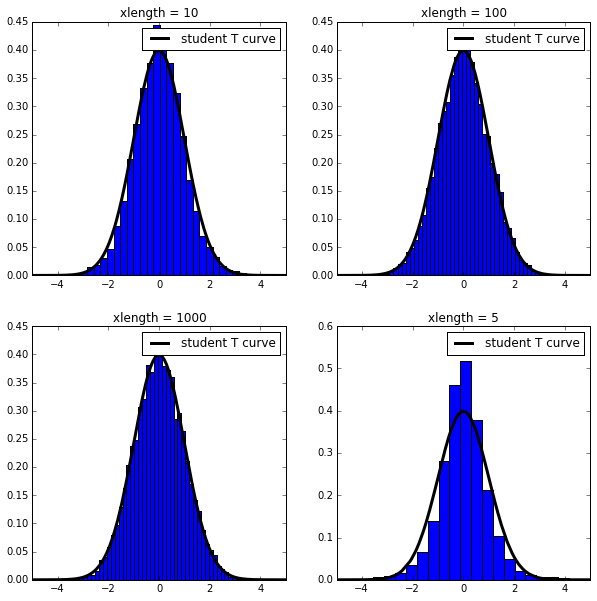

In [16]:
N = 10000
xl = [5, 10, 100, 1000]

fig = plt.figure(figsize=(10,10))
for ind, a in enumerate(xl):
    b = np.zeros(N)
    syx = np.zeros(N)
    for i in range(0, N, 1):
        x = np.random.normal(0, 1, a)
        y = x + np.random.normal(0, 2, a)
        b[i] = np.sum((y-np.mean(y))*x)/np.sum((x-np.mean(x))*x)
        yhat = b[i]*x + np.mean(y)-b[i]*np.mean(x)
        syx[i] = np.sqrt(np.sum((y-yhat)**2)/(N-2))
    df = N-2
    tnminus2 = (b-np.mean(b))*np.sum((x-np.mean(x))**2)/syx
    tnminus2 = np.sort(tnminus2)
    rv = stats.t.pdf(tnminus2, df)
    ax1 = plt.subplot(2,2,ind); n, bins, patches = plt.hist(((b-np.mean(b))/np.std(b)), 50, normed=1)
    plt.plot(tnminus2, rv, 'k-', lw=3, alpha=1, label="student T curve")
    plt.legend(loc=1)
    plt.xlim(-5,5)
    plt.title('xlength = ' + str(a))

## Q3: Linear comparison of Deep Cove data to James Bay temperature data

Data was collected from a number of weather stations by the Victoria Weather Network.  In the file below is hourly temperature data (in degrees Celsius) and we will consider two of the stations in that file:

In [8]:
# Load the data:

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb = hourdata[1,:]
dcc=dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

**1** Make a scatterplot of James Bay versus Deep Cove.

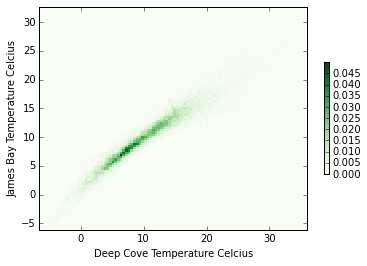

In [9]:
(n, xx, yy, im) = plt.hist2d(dc, jb, bins=100, cmap=cm.Greens, cmin=0., normed=1)
plt.colorbar(im, shrink=0.5)
plt.xlabel('Deep Cove Temperature Celcius'); plt.ylabel('James Bay Temperature Celcius')

**2** Compute the linear Correlation Co-efficient (without a canned routine)

In [10]:
r = m.sqrt((np.sum((dc-np.mean(dc))*(jb-np.mean(jb)))**2)/(np.sum((dc-np.mean(dc))**2)*np.sum((jb-np.mean(jb))**2)))

print "Linear Correlation Coefficient between Deep Cove and James Bay Temperature: " + str(r)

Linear Correlation Coefficient between Deep Cove and James Bay Temperature: 0.965371669021


**3** Fit a straight line to the James Bay data as a fucntion of the Deep Cove data, and add to the scatter plot made above.  Comment on the fit.

<hr>

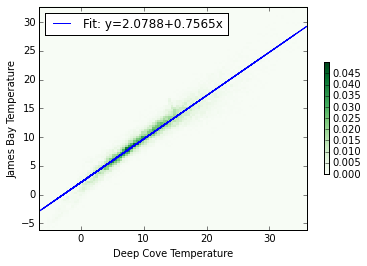

In [11]:
def colourbarwithfit(x, y):
    b = np.sum((y[1]-np.mean(y[1]))*x[1])/(np.sum((x[1]-np.mean(x[1]))*x[1]))
    a = np.mean(y[1])-b*np.mean(x[1])
    (n, xx, yy, im) = plt.hist2d(x[1], y[1], bins=100, cmap=cm.Greens, cmin=0., normed=1)
    plt.colorbar(im, shrink=0.5)
    plt.plot(x[1], b*x[1] +a, label='Fit: y=%1.4f+%1.4fx'%(a,b))
    plt.legend(loc=0)
    plt.xlabel(x[0]); plt.ylabel(y[0])

x = ['Deep Cove Temperature',dc]
y = ['James Bay Temperature',jb]
colourbarwithfit(x,y)

The fit goes right through the densest part of the data, still a significant amount of data that lies off of the fit line.

**4** Add the confidence intervals to your fit, and comment.

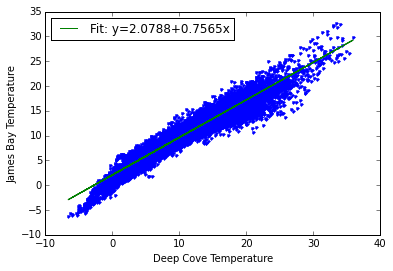

In [12]:
def colorbarwithfitandintervals(x, y):
    b = np.sum((y[1]-np.mean(y[1]))*x[1])/(np.sum((x[1]-np.mean(x[1]))*x[1]))
    a = np.mean(y[1])-b*np.mean(x[1])
    yhat = b*x[1]+a
    syx = np.sqrt(np.sum((y[1]-yhat)**2)/(x[1].size - 2))
    bdn,bup = stats.t.interval(0.95, df=x[1].size-2, scale=1)
    bb=np.array([bdn,bup])
    bb=bb/np.sqrt(np.sum((x[1]-np.mean(x[1]))**2))
    xx=np.sort(x[1])
    yhathi=(b+bb[1])*(xx-np.mean(x[1]))+np.mean(y[1])
    yhatlo=(b+bb[0])*(xx-np.mean(x[1]))+np.mean(y[1])
    fig,ax = plt.subplots(1,1)
    ax.plot(x[1],y[1], '.')
    ax.plot(x[1], yhat, label='Fit: y=%1.4f+%1.4fx'%(a,b))
    plt.legend(loc=0)
    ax.set_xlabel(x[0]); ax.set_ylabel(y[0])
    ax.fill_between(xx,yhathi, yhatlo, alpha=0.4)
    
    
colorbarwithfitandintervals(x,y)

intervals appear exceedingly narrow, will have to look into this further.

**5** Note that we have assumed that the Deep Cove data is independent and that the James Bay data is dependent.  There is no reason to assume this!  Do the fit in the other direction, and compare the slopes.

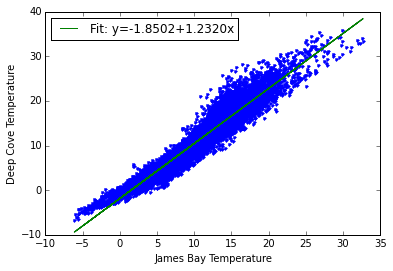

In [13]:
colorbarwithfitandintervals(y,x) 

Interestingly, the slope of deep cove versus james bay is not the reciprocal of the slope for james bay versus deep cove as I would have expected. 1/.75 = 1.33 rather than 1.23

**NOTE** There is a way to treat both axes independently called "Neutral Regression".  It is relatively simple, and involves normalizing the total distance of each point from the trend line. <a href="http://journals.ametsoc.org/doi/pdf/10.1175/1520-0426(1999)016%3C0876%3AAPFANR%3E2.0.CO%3B2">(Marsden 1999)</a>. This technique is strongly preferred if there is no reason to think that one data set is dependent on the other.  A caveat is that the data sets shoudl be normalized before fitting so that the "distance" has meaning.  